‘Time’ is the most important factor which ensures success in a business. It’s difficult to keep up with the pace of time.  But, technology has developed some powerful methods using which we can ‘see things’ ahead of time!
Nope, not the time machine, we are talking about the methods of prediction & forecasting. As the name ‘time series forecasting’ suggests, it involves working on time (years, days, hours, minutes) based data, to derive hidden insights to make informed decision making. 
Hence, here is the solution for the Janata Hack: Time series forecasting for Electricity usage that gave me **Top 2% (88th rank from 4600+ participants). **

# 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time
from datetime import datetime
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
train = pd.read_csv('../input/electricity-consumption/train.csv')
test = pd.read_csv('../input/electricity-consumption/test.csv')

In [3]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       26496 non-null  int64  
 1   datetime                 26496 non-null  object 
 2   temperature              26496 non-null  float64
 3   var1                     26496 non-null  float64
 4   pressure                 26496 non-null  float64
 5   windspeed                26496 non-null  float64
 6   var2                     26496 non-null  object 
 7   electricity_consumption  26496 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB
None


,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [4]:
test.head(10)

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A
5,557,2013-07-24 05:00:00,-10.7,-20.0,1009.0,2.915,A
6,558,2013-07-24 06:00:00,-12.1,-20.7,997.0,6.295,A
7,559,2013-07-24 07:00:00,-15.7,-17.9,1003.0,8.675,A
8,560,2013-07-24 08:00:00,-12.9,-17.1,996.0,12.180,A
9,561,2013-07-24 09:00:00,-10.0,-19.3,999.0,2.140,A


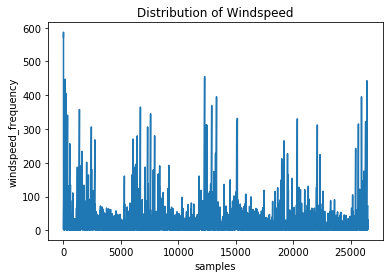

In [5]:
w = train.windspeed
plt.plot(w)
plt.xlabel('samples')
plt.ylabel('windspeed_frequency')
plt.title('Distribution of Windspeed')
plt.show()

In [6]:
print(f'The average wind speed is {round(train.windspeed.mean(),2)}')
print(f'The maximum wind speed is {train.windspeed.max()} and minimum wind speed is {train.windspeed.min()}')

The average wind speed is 23.96
The maximum wind speed is 586.6 and minimum wind speed is 1.075


The average Pressure parameter is 986.45
The maximum Pressure value is 1024.0 and minimum pressure value is 953.0


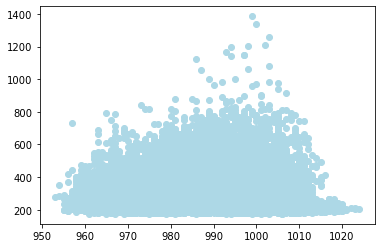

In [7]:
print(f'The average Pressure parameter is {round(train.pressure.mean(),2)}')
print(f'The maximum Pressure value is {train.pressure.max()} and minimum pressure value is {train.pressure.min()}')
plt.scatter(train.pressure,train.electricity_consumption,c='lightblue')
plt.show()

A    25239
C     1040
B      217
Name: var2, dtype: int64


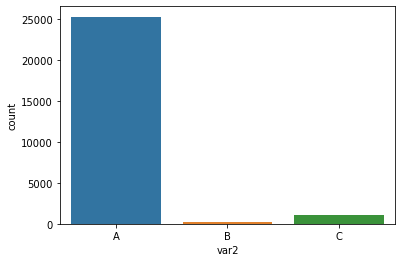

In [8]:
import seaborn as sns
print(train.var2.value_counts())
sns.countplot(x='var2',data=train)

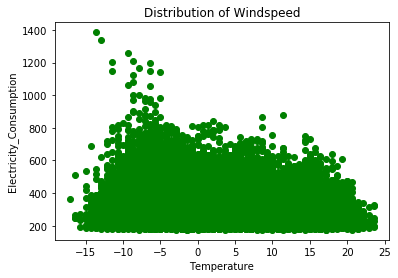

In [9]:
plt.scatter(train.temperature,train.electricity_consumption,c='green')
plt.xlabel('Temperature')
plt.ylabel('Electricity_Consumption')
plt.title('Distribution of Windspeed')
plt.show()

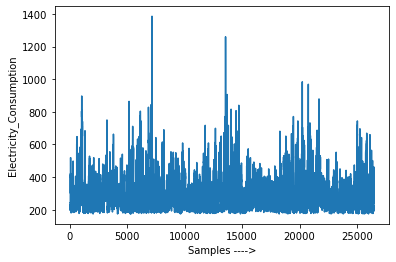

In [10]:
plt.plot(train.electricity_consumption)
plt.xlabel('Samples ---->')
plt.ylabel('Electricity_Consumption')
plt.show()

# 2.Feature Engineering Process

In [11]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
train['var2']=LE.fit_transform(train.var2)

In [12]:
print(train.var2.value_counts())
train.head()

0    25239
2     1040
1      217
Name: var2, dtype: int64


,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,0,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,0,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,0,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,0,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,0,222.0


In [13]:
test['var2']=LE.fit_transform(test.var2)
test.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,0
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,0
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,0
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,0
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,0


REMEMBER: 'A'---> 1, 'B'--->1,'C'---> 2

In [14]:
def datetounix(df):
    # Calling an list of unixtime
    unixtime = []
    
    # Convert Date to seconds
    for date in df['datetime']:
        unixtime.append(time.mktime(date.timetuple()))
    
    # Replacing Date with unixtime list
    df['datetime'] = unixtime
    return(df)

In [15]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           8568 non-null   int64         
 1   datetime     8568 non-null   datetime64[ns]
 2   temperature  8568 non-null   float64       
 3   var1         8568 non-null   float64       
 4   pressure     8568 non-null   float64       
 5   windspeed    8568 non-null   float64       
 6   var2         8568 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 468.7 KB


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       26496 non-null  int64         
 1   datetime                 26496 non-null  datetime64[ns]
 2   temperature              26496 non-null  float64       
 3   var1                     26496 non-null  float64       
 4   pressure                 26496 non-null  float64       
 5   windspeed                26496 non-null  float64       
 6   var2                     26496 non-null  int64         
 7   electricity_consumption  26496 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 1.6 MB


Extracting data from datetime column and creating new features

In [17]:
train['Weekday'] = [datetime.weekday(date) for date in train.datetime]
train['Year'] = [date.year for date in train.datetime]
train['Month'] = [date.month for date in train.datetime]
train['Day'] = [date.day for date in train.datetime]
train['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in train.datetime]
train['Week'] = [date.week for date in train.datetime]
train['Quarter'] = [date.quarter for date in train.datetime]

In [18]:
test['Weekday'] = [datetime.weekday(date) for date in test.datetime]
test['Year'] = [date.year for date in test.datetime]
test['Month'] = [date.month for date in test.datetime]
test['Day'] = [date.day for date in test.datetime]
test['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in test.datetime]
test['Week'] = [date.week for date in test.datetime]
test['Quarter'] = [date.quarter for date in test.datetime]
test.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,Weekday,Year,Month,Day,Time,Week,Quarter
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,0,2,2013,7,24,0,30,3
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,0,2,2013,7,24,3600,30,3
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,0,2,2013,7,24,7200,30,3
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,0,2,2013,7,24,10800,30,3
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,0,2,2013,7,24,14400,30,3


In [19]:
train.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,Weekday,Year,Month,Day,Time,Week,Quarter
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,0,216.0,0,2013,7,1,0,27,3
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,0,210.0,0,2013,7,1,3600,27,3
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,0,225.0,0,2013,7,1,7200,27,3
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,0,216.0,0,2013,7,1,10800,27,3
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,0,222.0,0,2013,7,1,14400,27,3


In [20]:
print(train.shape,test.shape)

(26496, 15) (8568, 14)


In [21]:
X_train = train.drop(['ID','electricity_consumption'],axis=1)
X_train.head()

,datetime,temperature,var1,pressure,windspeed,var2,Weekday,Year,Month,Day,Time,Week,Quarter
0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,0,0,2013,7,1,0,27,3
1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,0,0,2013,7,1,3600,27,3
2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,0,0,2013,7,1,7200,27,3
3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,0,0,2013,7,1,10800,27,3
4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,0,0,2013,7,1,14400,27,3


In [22]:
X_train = datetounix(X_train)

In [23]:
X = X_train.values
y = train['electricity_consumption'].values

In [24]:
X

array([[ 1.3726368e+09, -1.1400000e+01, -1.7100000e+01, ...,
         0.0000000e+00,  2.7000000e+01,  3.0000000e+00],
       [ 1.3726404e+09, -1.2100000e+01, -1.9300000e+01, ...,
         3.6000000e+03,  2.7000000e+01,  3.0000000e+00],
       [ 1.3726440e+09, -1.2900000e+01, -2.0000000e+01, ...,
         7.2000000e+03,  2.7000000e+01,  3.0000000e+00],
       ...,
       [ 1.4982516e+09, -1.4000000e+00, -1.2900000e+01, ...,
         7.5600000e+04,  2.5000000e+01,  2.0000000e+00],
       [ 1.4982552e+09, -2.9000000e+00, -1.1400000e+01, ...,
         7.9200000e+04,  2.5000000e+01,  2.0000000e+00],
       [ 1.4982588e+09, -2.1000000e+00, -1.1400000e+01, ...,
         8.2800000e+04,  2.5000000e+01,  2.0000000e+00]])

In [25]:
X_test = datetounix(test).drop(['ID'], axis=1).values
X_test

array([[ 1.3746240e+09, -1.0000000e+01, -1.6400000e+01, ...,
         0.0000000e+00,  3.0000000e+01,  3.0000000e+00],
       [ 1.3746276e+09, -1.0000000e+01, -2.0700000e+01, ...,
         3.6000000e+03,  3.0000000e+01,  3.0000000e+00],
       [ 1.3746312e+09, -1.0700000e+01, -1.7100000e+01, ...,
         7.2000000e+03,  3.0000000e+01,  3.0000000e+00],
       ...,
       [ 1.4988564e+09, -7.1000000e+00, -1.9300000e+01, ...,
         7.5600000e+04,  2.6000000e+01,  2.0000000e+00],
       [ 1.4988600e+09, -6.4000000e+00, -1.9300000e+01, ...,
         7.9200000e+04,  2.6000000e+01,  2.0000000e+00],
       [ 1.4988636e+09, -5.0000000e+00, -1.6400000e+01, ...,
         8.2800000e+04,  2.6000000e+01,  2.0000000e+00]])

In [26]:
# Standard Scaling
sc = StandardScaler()
X = sc.fit_transform(X)
# Normalizing the target variables
y_train = (y - min(y))/(max(y) - min(y))
y_train

array([0.03465347, 0.02970297, 0.04207921, ..., 0.03217822, 0.02970297,
       0.02970297])

In [27]:
X_test = sc.fit_transform(X_test)

# 3. Model Building using Dense Neural Networks

In [30]:
classifier = Sequential()
classifier.add(Dense(units = 10, kernel_initializer = 'uniform',input_dim =13, activation = 'relu'))
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mae']) # I used both Adam and SGD Optimzer, out of which the loss function was least in Adam.
classifier.fit(X, y_train, batch_size = 16, epochs = 25)

Epoch 1/25
26496/26496 [==============================] - 2s 90us/step - loss: 0.0207 - mae: 0.0933
Epoch 2/25
26496/26496 [==============================] - 2s 82us/step - loss: 0.0050 - mae: 0.0505
Epoch 3/25
26496/26496 [==============================] - 2s 86us/step - loss: 0.0047 - mae: 0.0492
Epoch 4/25
26496/26496 [==============================] - 2s 82us/step - loss: 0.0047 - mae: 0.0486
Epoch 5/25
26496/26496 [==============================] - 2s 82us/step - loss: 0.0046 - mae: 0.0484
Epoch 6/25
26496/26496 [==============================] - 2s 83us/step - loss: 0.0046 - mae: 0.0482
Epoch 7/25
26496/26496 [==============================] - 2s 81us/step - loss: 0.0046 - mae: 0.0480
Epoch 8/25
26496/26496 [==============================] - 2s 83us/step - loss: 0.0045 - mae: 0.0478
Epoch 9/25
26496/26496 [==============================] - 2s 81us/step - loss: 0.0045 - mae: 0.0476
Epoch 10/25
26496/26496 [==============================] - 2s 81us/step - loss: 0.0045 - mae: 0.0476

In [31]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred * (max(y) - min(y))) + min(y)

predictions = [int(i) for i in y_pred]

Solution = pd.DataFrame()
Solution['ID'] = test['ID']

# Prepare Solution dataframe
Solution['electricity_consumption'] = predictions
Solution['electricity_consumption'].unique()
Solution

,ID,electricity_consumption
0,552,176
1,553,174
2,554,175
3,555,174
4,556,255
...,...,...
8563,35059,177
8564,35060,178
8565,35061,176
8566,35062,176


Convert the dataframe to csv file format and check the output area to download and submit your predictions.  

In [33]:
Solution.to_csv('My_submission.csv')

# Do UPVOTE if you like this kernel Notebook! Happy Learning!!